# Задание 1
Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

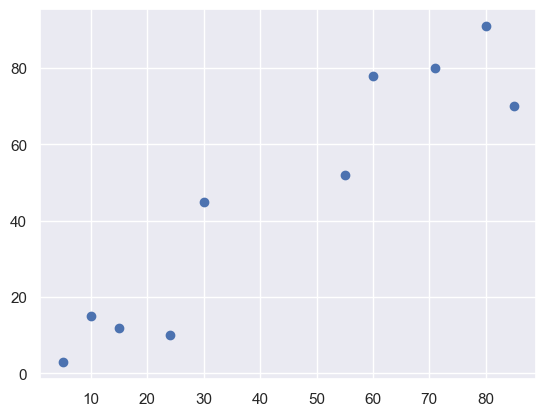

In [2]:
X = np.array([[5, 3],
           [10, 15],
           [15, 12],
           [24, 10],
           [30, 45],
           [85, 70],
           [71, 80],
           [60, 78],
           [55, 52],
           [80, 91],])

plt.scatter(X[:,0],X[:,1], label='True Position')

c:\Users\prozo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[70.2 74.2]
 [16.8 17. ]]
[1 1 1 1 1 0 0 0 0 0]


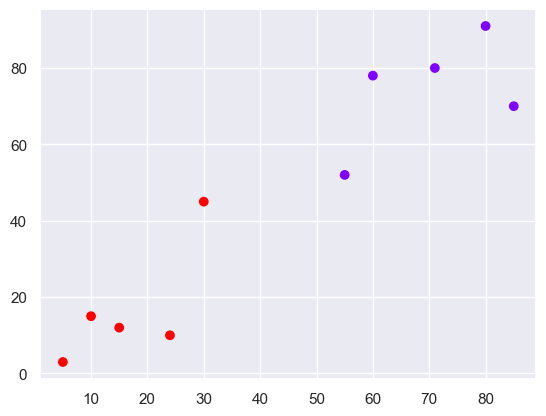

In [3]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print(kmeans.cluster_centers_)
print(kmeans.labels_)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

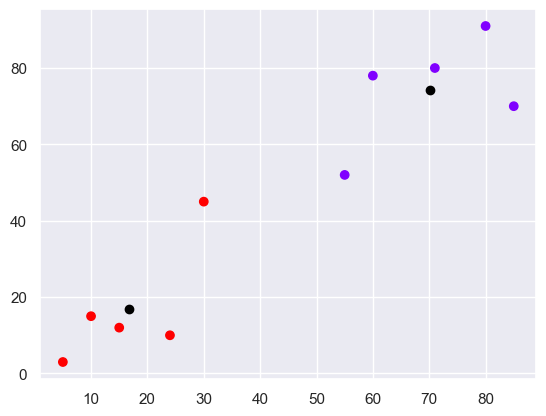

In [4]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')


# Задание 1.2
Выполните кластеризацию для набора данных ирисов Фишера. Выполните
предсказания для модели.

In [5]:
from sklearn import datasets
from sklearn.datasets._samples_generator import make_blobs

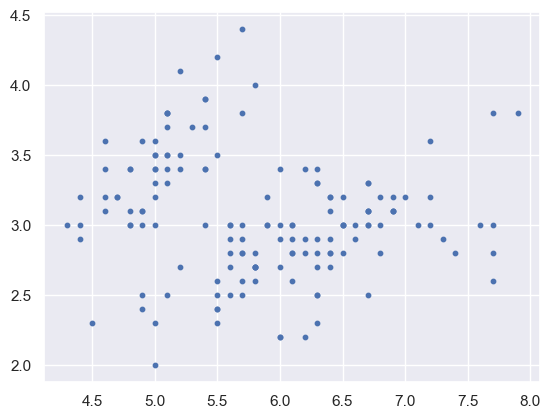

In [6]:
iris_df = datasets.load_iris()
plt.scatter(iris_df.data[:, 0], iris_df.data[:, 1], s = 10)

In [7]:
model = KMeans(n_clusters=10, random_state=0)
model.fit(iris_df.data)
all_predictions = model.predict(iris_df.data)

print(all_predictions)

[7 2 2 2 7 0 2 7 2 2 7 7 2 2 0 0 0 7 0 7 7 7 2 7 7 2 7 7 7 2 2 7 0 0 2 2 7
 7 2 7 7 2 2 7 7 2 7 2 7 7 9 9 9 6 9 3 9 5 9 6 5 3 6 3 6 9 3 6 3 6 1 3 1 3
 3 9 9 9 3 6 6 6 6 1 3 3 9 3 6 6 6 3 6 5 6 6 6 3 5 6 4 1 4 4 4 8 6 8 4 8 4
 1 4 1 1 4 4 8 8 1 4 1 8 1 4 8 1 1 4 4 8 8 4 1 1 8 4 4 1 4 4 4 1 4 4 4 1 4
 4 1]


c:\Users\prozo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


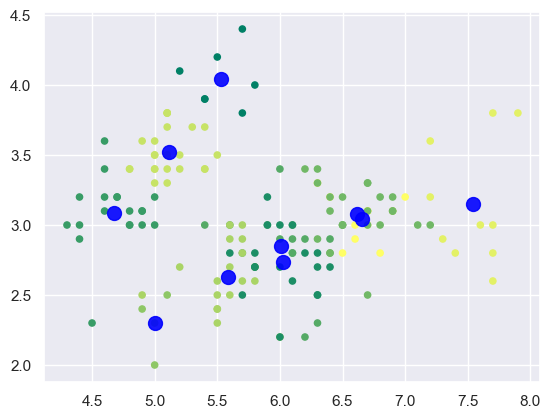

In [8]:
from sklearn.datasets._samples_generator import make_blobs

X, y_true = make_blobs(n_samples=400, cluster_std=0.6, random_state=0)

plt.scatter(iris_df.data[:, 0], iris_df.data[:, 1], c=all_predictions, s = 20, cmap='summer')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9)

# Задание 2
Выполните иерархическую кластеризацию для набора данных об
ирисах Фишера. При этом необходимо использовать любые два признака
(всего их четыре).


In [9]:
import pandas as pd
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [10]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
customer_data = pd.read_csv(url)
customer_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [11]:
data = customer_data.iloc[:, 1: 3].values

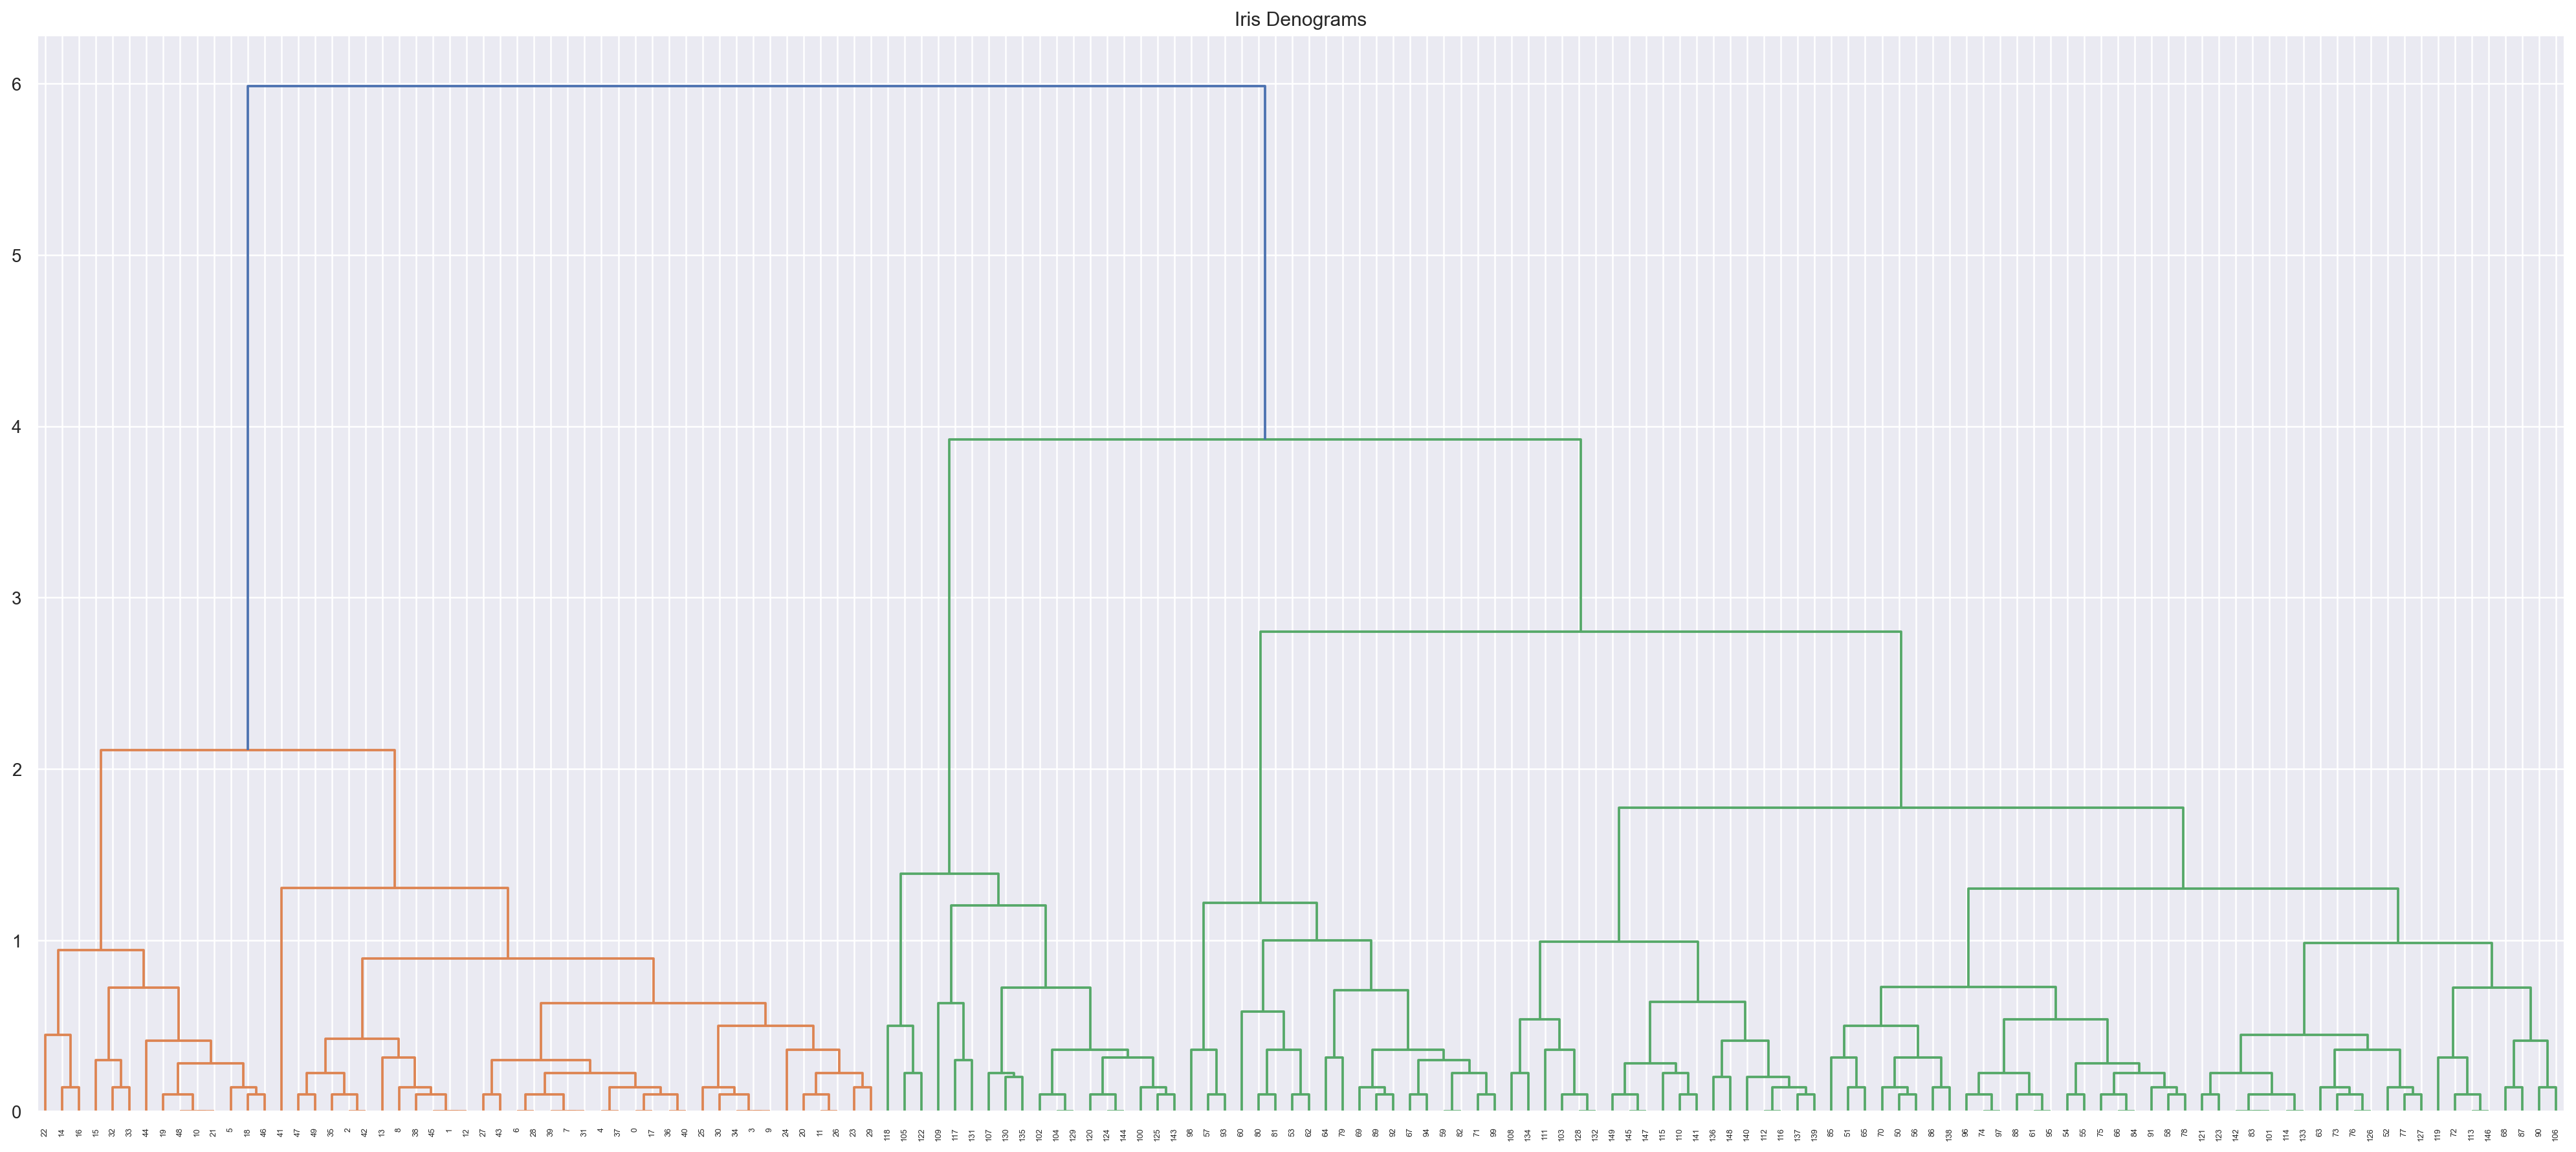

In [12]:
plt.figure(figsize=(28, 12), dpi=180)
plt.title("Iris Denograms")
dend = shc.dendrogram(shc.linkage(data, method='complete'))

In [13]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
cluster.fit_predict(data)

c:\Users\prozo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 4, 4, 1, 4, 4, 1, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 4, 1, 4, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0], dtype=int64)

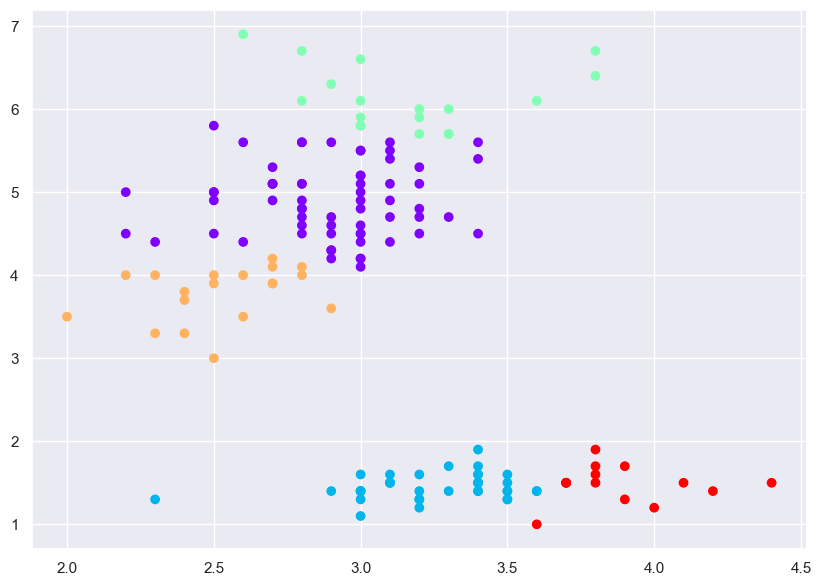

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap='rainbow')